<a href="https://colab.research.google.com/github/rohailkhan/Machine_learning_Python/blob/master/SeattleAirBnbDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Airbnb hosts in Seattle
As more travellers choose Airbnb as their primary lodging provider, Airbnb has successfully disrupted the traditional hospitality industry. Since its founding in 2008, Airbnb has experienced exponential growth, with the number of rentals listed on its website increasing at an exponential rate each year.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
%matplotlib inline


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
import os
os.listdir()

['.config', 'sample_data']

In [6]:
# path='https://raw.githubusercontent.com/rohailkhan/SeattleAirBnbDataAnalysis/main/calendar.csv'
path='https://raw.githubusercontent.com/rohailkhan/SeattleAirBnbDataAnalysis/main'

In [7]:
calendar=pd.read_csv(path+'/calendar.csv')
listings=pd.read_csv(path+'/listings.csv')
reviews=pd.read_csv(path+'/reviews.csv')

In [8]:
calendar.shape, listings.shape,reviews.shape

((1393570, 4), (3818, 92), (84849, 6))

In [9]:
calendar.head(2)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00

In [ ]:
calendar.isnull().mean()*100

listing_id     0.00000
date           0.00000
available      0.00000
price         35.08994
dtype: float64

In [ ]:
reviews.head(2)

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...

In [ ]:
listings.head(2)

id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                      xl_picture_url  host_id  \
0                                                NaN   956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...  5177328   

                                    host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1  https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...         Queen Anne   
1  https://a0.muscache.com/ac/users/5177328/profi...         Queen Anne   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0               ['email', 'phone', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'linkedin', 're...                    t   

  host_identity_verified                                             street  \
0                      t      Gilman Dr W, Seattle, WA 98119, United States   
1                      t  7th Avenue West, Seattle, WA 98119, United States   

  neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city  \
0    Quee

## First cleaning the "listings.csv" file

In [ ]:
columns_to_keep=['id',
 'host_location',
  'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city','price',
 'state',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 ##
 'room_type', 'bed_type',##
 'accommodates',
 'bathrooms',
 'bedrooms',
 'amenities',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'cancellation_policy']

In [ ]:
listings=pd.read_csv('listings.csv')

In [ ]:
def clean_listings(df):
    # 1-using only the required columns
    df=df[columns_to_keep]
    # 2-cleaning and converting ['cleaning_fee','extra_people', 'price'] to float
    change_to_float_columns=['cleaning_fee','extra_people', 'price']
    for col in change_to_float_columns:
        df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
    # 3- replacing null values by mean for some features
    fill_mean_columns=['cleaning_fee','review_scores_rating','review_scores_cleanliness','review_scores_location']
    
    for col in fill_mean_columns:
        df[col]=df[col].fillna(df[col].mean())
    outlier_columns=['price', 'extra_people', 'cleaning_fee','bathrooms','bedrooms']
    for col in outlier_columns:
        df[col]=np.where(df[col]>df[col].quantile(0.80),df[col].quantile(0.80),df[col])

    # 4- dropping small number of null values for some numeric columns
    df.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

    # 5- dropping small number of null values for some object columns

    df.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)
    
    # 6- Adding a column ['amenities_number'] that shows the quantity of amenties
    df['amenities']=df['amenities'].str.strip('{}').str.replace('"','').str.split(',')
    h=[]
    for i in df.amenities:
        h.append(len(i))
    df['amenities_number']=h

    # 7- Dropping ['id' ,'amenties'] columns
    df.drop(columns=['id','amenities'],inplace=True)

    # 8-making dummy variables for categorical data
    categorical_features=df.select_dtypes(include=['object'])
    for col in categorical_features:
        df=pd.concat([df.drop(col,axis=1)  , pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    
    # 9- Getting feature matrix X and Target matrix y
    X=df.drop(['price'],axis=1)
    y=df[['price']]
    
    return X,y,df


## Cleaning "reviews.csv"

In [ ]:
reviews.isnull().mean().sort_values(ascending=False)

comments         0.0
reviewer_name    0.0
reviewer_id      0.0
date             0.0
id               0.0
listing_id       0.0
dtype: float64

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
reviews.describe()

listing_id            id   reviewer_id
count  8.483100e+04  8.483100e+04  8.483100e+04
mean   3.005270e+06  3.058980e+07  1.701347e+07
std    2.472827e+06  1.636519e+07  1.353705e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725821e+07  5.053141e+06
50%    2.488228e+06  3.228949e+07  1.413622e+07
75%    4.694479e+06  4.457748e+07  2.762404e+07
max    1.024814e+07  5.873651e+07  5.281274e+07

## Cleaning "calender.csv"

In [ ]:
calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [ ]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [ ]:
calendar.head(3)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN

In [ ]:
calendar['price']=calendar['price'].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)

In [ ]:
calendar.describe()

listing_id          price
count  1.393570e+06  934542.000000
mean   5.550111e+06     137.944859
std    2.962274e+06     105.062870
min    3.335000e+03      10.000000
25%    3.258213e+06      75.000000
50%    6.118244e+06     109.000000
75%    8.035212e+06     160.000000
max    1.034016e+07    1650.000000

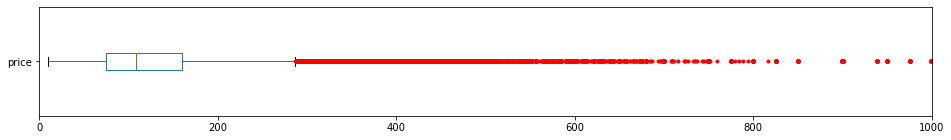

In [ ]:
## we see some outliers in 'price'. Let us visualize
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
calendar['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [ ]:
calendar.drop(calendar[ (calendar['price'] > 250) ].index, axis=0, inplace=True)


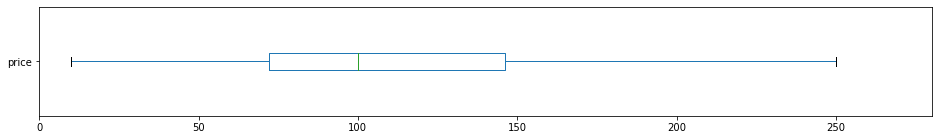

In [ ]:
calendar['price'].plot(kind='box', xlim=(0,280), vert=False, flierprops=red_square, figsize=(16,2));

In [ ]:
def clean_listings_without_dummy(df):
    # 1-using only the required columns
    df=df[columns_to_keep]
    # 2-cleaning and converting ['cleaning_fee','extra_people', 'price'] to float
    change_to_float_columns=['cleaning_fee','extra_people', 'price']
    for col in change_to_float_columns:
        df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
    # 3- replacing null values by mean for some features
    fill_mean_columns=['cleaning_fee','review_scores_rating','review_scores_cleanliness','review_scores_location']
    
    for col in fill_mean_columns:
        df[col]=df[col].fillna(df[col].mean())
    outlier_columns=['price', 'extra_people', 'cleaning_fee','bathrooms','bedrooms']
    for col in outlier_columns:
        df[col]=np.where(df[col]>df[col].quantile(0.80),df[col].quantile(0.80),df[col])

    # 4- dropping small number of null values for some numeric columns
    df.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

    # 5- dropping small number of null values for some object columns

    df.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)
    
    # 6- Adding a column ['amenities_number'] that shows the quantity of amenties
    df['amenities']=df['amenities'].str.strip('{}').str.replace('"','').str.split(',')
    h=[]
    for i in df.amenities:
        h.append(len(i))
    df['amenities_number']=h

    # 7- Dropping ['id' ,'amenties'] columns
    df.drop(columns=['id','amenities'],inplace=True)

    # # 8-making dummy variables for categorical data
    # categorical_features=df.select_dtypes(include=['object'])
    # for col in categorical_features:
    #     df=pd.concat([df.drop(col,axis=1)  , pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    
    # # 9- Getting feature matrix X and Target matrix y
    # X=df.drop(['price'],axis=1)
    # y=df[['price']]
    
    return df


In [ ]:
df=clean_listings_without_dummy(listings)

<ipython-input-738-410c047f2499>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
<ipython-input-738-410c047f2499>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())
<ipython-input-738-410c047f2499>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df.head(2)

host_location host_neighbourhood host_has_profile_pic  \
0  Seattle, Washington, United States         Queen Anne                    t   
1  Seattle, Washington, United States         Queen Anne                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      t    Queen Anne        West Queen Anne   
1                      t    Queen Anne        West Queen Anne   

  neighbourhood_group_cleansed     city  price state   latitude   longitude  \
0                   Queen Anne  Seattle   85.0    WA  47.636289 -122.371025   
1                   Queen Anne  Seattle  150.0    WA  47.639123 -122.365666   

  is_location_exact property_type        room_type  bed_type  accommodates  \
0                 t     Apartment  Entire home/apt  Real Bed             4   
1                 t     Apartment  Entire home/apt  Real Bed             4   

   bathrooms  bedrooms  cleaning_fee  guests_included  extra_people  \
0        1.0       1.0     61.710904                2           5.0   
1        1.0       1.0     40.000000                1           0.0   

   minimum_nights  maximum_nights  review_scores_rating  \
0               1             365                  95.0   
1               2              90                  96.0   

   review_scores_cleanliness  review_scores_location cancellation_policy  \
0                       10.0                     9.0            moderate   
1                       10.0                    10.0              strict   

   amenities_number  
0                10  
1                16

# Question 1 - Which are the top expensive Neighborhoods ?

In [ ]:
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed'])['price'].median())[0:15].sort_values(by='price',ascending=False).reset_index()
df_grouped

neighbourhood_group_cleansed  price
0                      Downtown  140.0
1                      Magnolia  125.0
2                    Queen Anne  120.0
3                       Cascade  115.0
4                  Capitol Hill  105.0
5                  Central Area  100.0
6           Other neighborhoods   99.0
7                       Ballard   95.0
8                   Seward Park   93.0
9                      Interbay   90.0
10                    Northgate   80.0
11                  Beacon Hill   79.0
12               Rainier Valley   79.0
13                     Delridge   72.0
14                    Lake City   70.0

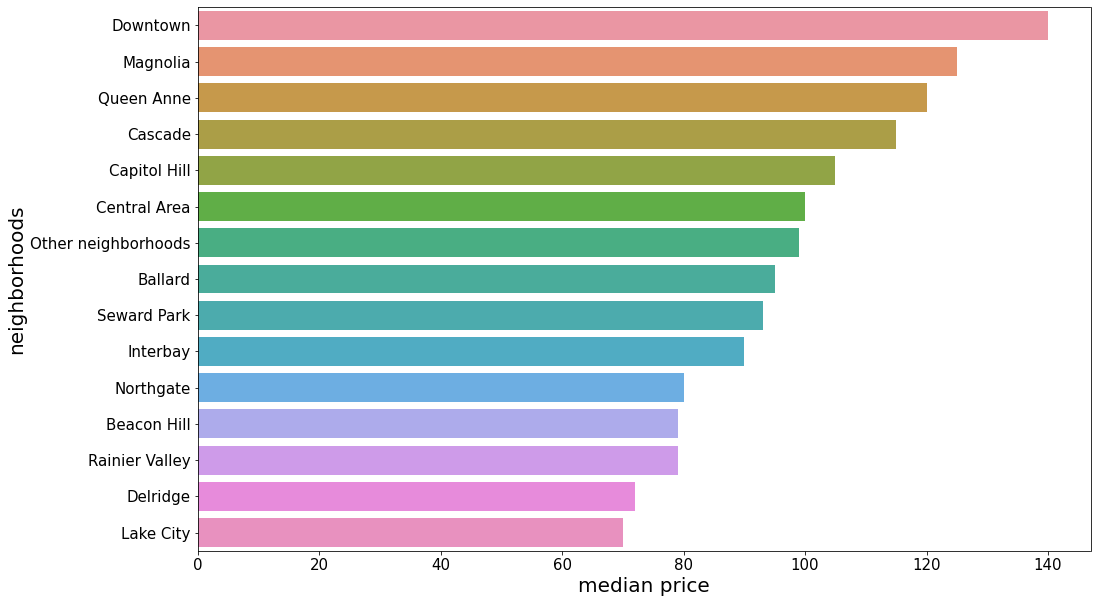

In [ ]:
import matplotlib.pyplot as plt
fig, ax = pyplot.subplots(figsize=(16,10))
ax = sns.barplot(x='price', y='neighbourhood_group_cleansed', data=df_grouped)
ax.set_xlabel('median price',fontsize=20)
ax.set_ylabel('neighborhoods',fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

# Question 2 - Which is the price range of different Neighborhoods ?

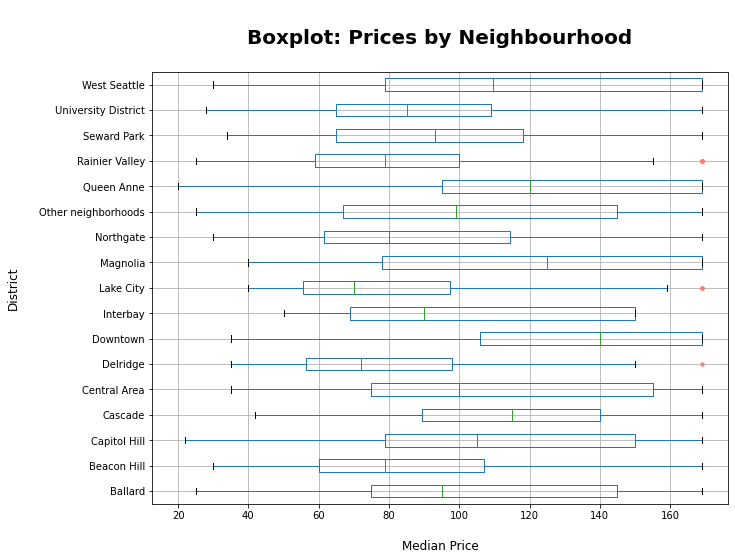

In [ ]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df.boxplot(column='price', by='neighbourhood_group_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=20, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

# Question What is correlation between Prices according to Neighbourhood and Number of Bedrooms

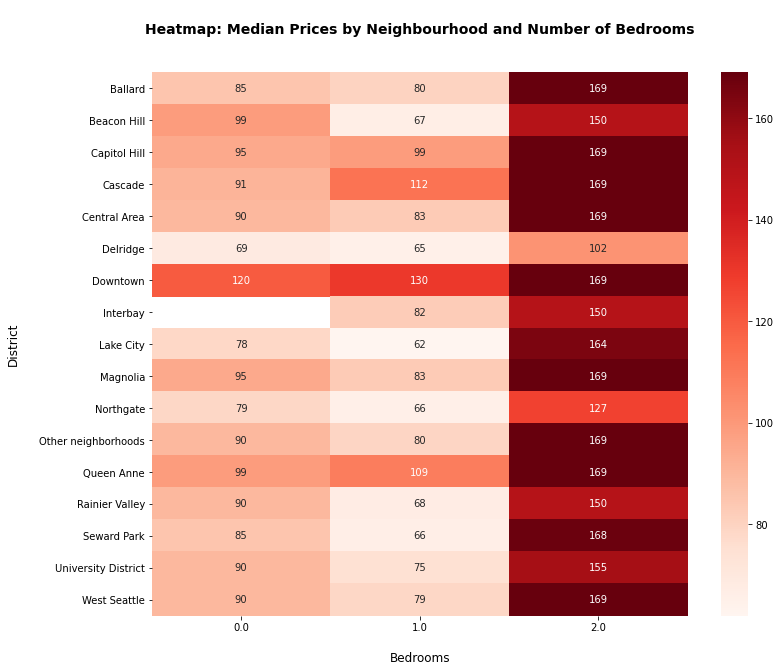

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

# Question 4: Is there any effect of Cancellation policy on the price?

In [ ]:
df.groupby(['cancellation_policy'])['price'].agg(np.median)

cancellation_policy
flexible     90.0
moderate     99.0
strict      129.0
Name: price, dtype: float64

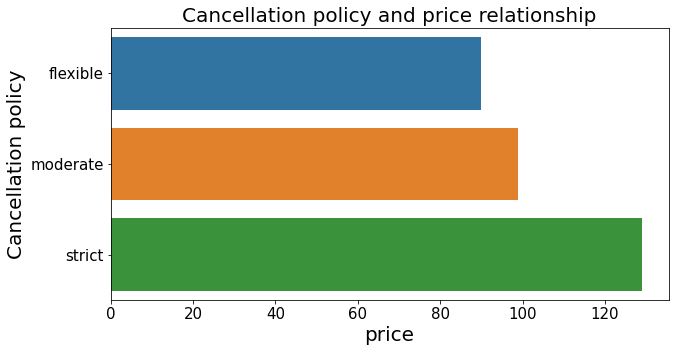

In [ ]:
#cacnellation=
dd=df.groupby(['cancellation_policy'])['price'].median().reset_index()
fig, ax = pyplot.subplots(figsize=(10,5))
ax = sns.barplot(x='price', y='cancellation_policy', data=dd)
ax.set_xlabel('price',fontsize=20)
ax.set_ylabel('Cancellation policy',fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Cancellation policy and price relationship',fontsize=20)
plt.show()

# Question What are the Number of Hosts per District

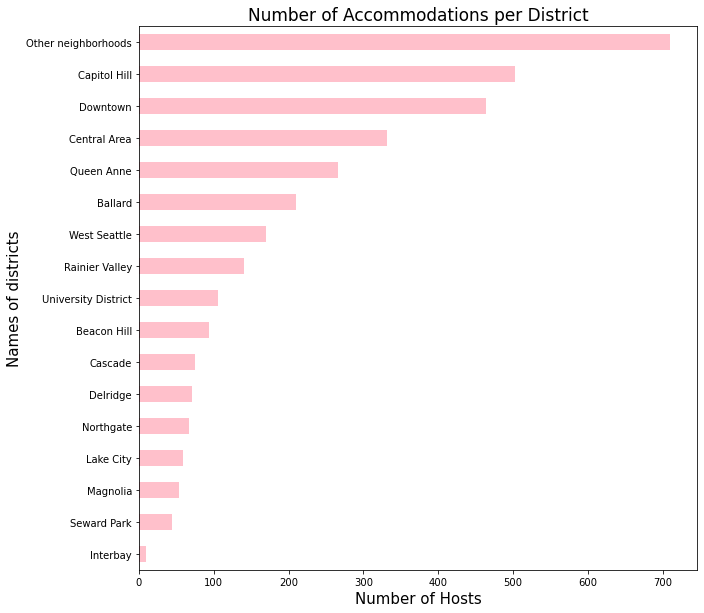

In [ ]:
df['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='pink',figsize=(10,10))
plt.xlabel('Number of Hosts',fontsize=15)
plt.ylabel('Names of districts',fontsize=15)
plt.title('Number of Accommodations per District',fontsize=17);

# Question :What is the relation between number of ameneties and price?

In [ ]:
df_grouped = pd.DataFrame(df.groupby(['amenities_number'])['price'].agg(np.median).sort_values(ascending=False))[0:12]
df_grouped.reset_index(inplace=True)

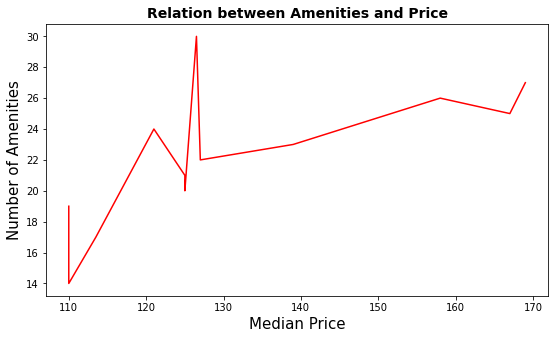

In [ ]:
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='line', y='amenities_number', x='price', 
                figsize=(9,5), legend=False, color='red')
plt.xlabel('Median Price', fontsize=15)
plt.ylabel('Number of Amenities', fontsize=15)
plt.title('Relation between Amenities and Price', fontsize=14, fontweight='bold');
plt.show()

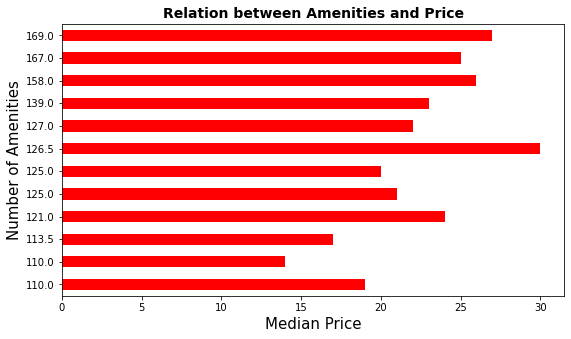

In [ ]:
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', y='amenities_number', x='price', 
                figsize=(9,5), legend=False, color='red')
plt.xlabel('Median Price', fontsize=15)
plt.ylabel('Number of Amenities', fontsize=15)
plt.title('Relation between Amenities and Price', fontsize=14, fontweight='bold');
plt.show()

In [ ]:
dd=df.groupby('amenities_number')['price'].median().reset_index().sort_values(by='price',ascending=False)[0:20]

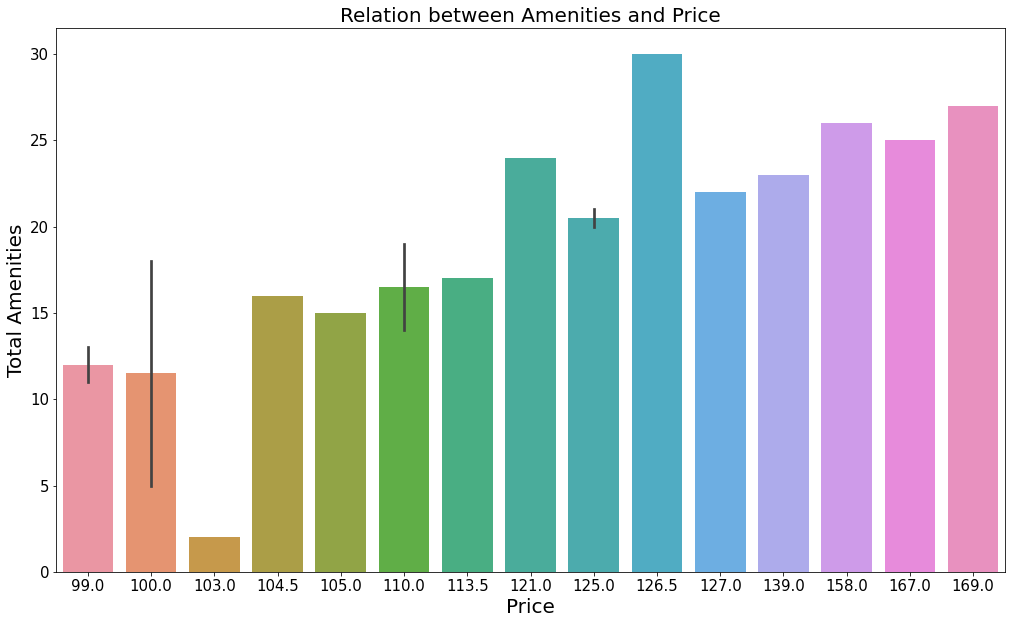

In [ ]:
fig, ax = pyplot.subplots(figsize=(17,10))
ax = sns.barplot(x='price', y='amenities_number', data=dd)
ax.set_xlabel('Price',fontsize=20)
ax.set_ylabel('Total Amenities',fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Relation between Amenities and Price',fontsize=20)
plt.show()

# Predicting Price of host

In [ ]:
X,y,df=clean_listings(listings)

<ipython-input-404-f34cb7f5ca28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
<ipython-input-404-f34cb7f5ca28>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())
<ipython-input-404-f34cb7f5ca28>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test,kk=30):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=kk)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# # load the dataset
# X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# feature selection

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,150)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
y_test_pred = model.predict(X_test_fs)
# evaluate predictions
mae=mean_absolute_error(y_test, y_test_pred)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
print('MAE: %.3f' % mae)

MAE: 20.488


In [ ]:
y_train_pred = model.predict(X_train_fs)

In [ ]:

print("R2-score for Train Data = " + str(r2_scores_train[np.argmax(r2_scores_test)])) # The model we should implement train_r2
print("R2-score for Test Data = " + str(r2_scores_test[np.argmax(r2_scores_test)])) # The model we should implement test_r2


R2-score for Train Data = 0.5935781071699725
R2-score for Test Data = 0.5154481606150311


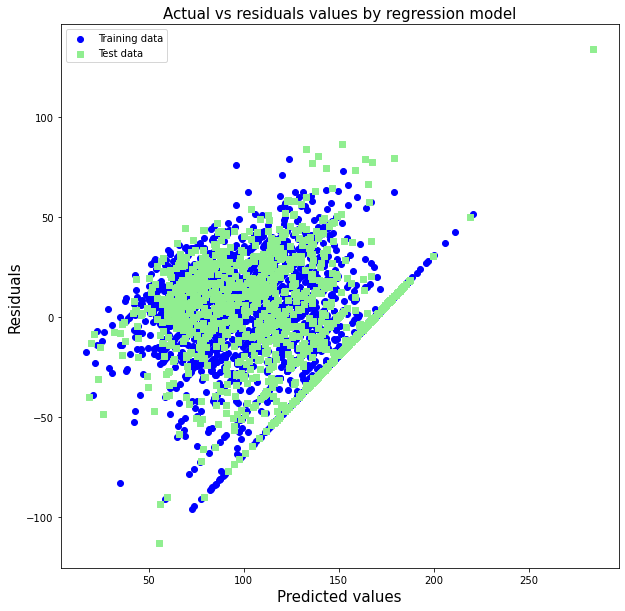

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test.values,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Actual vs residuals values by regression model', fontsize=15)
plt.legend(loc='upper left')
plt.show()

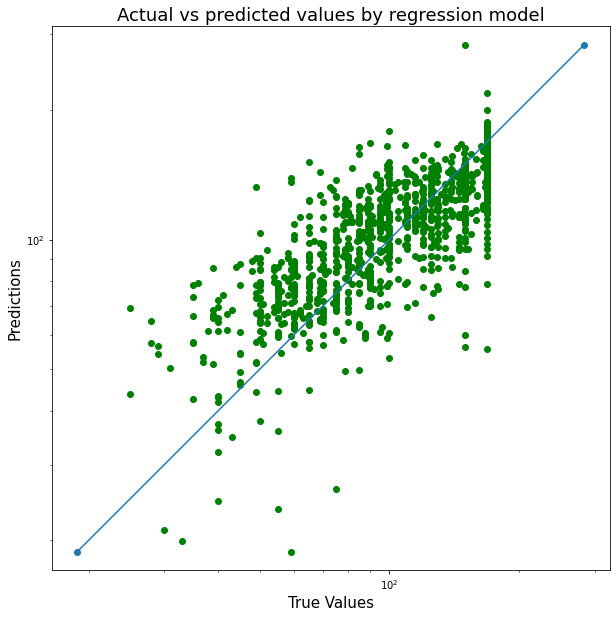

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test.values))
p2 = min(min(y_test_pred), min(y_test.values))
plt.plot([p1, p2], [p1, p2], 'o-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted values by regression model', fontsize=18)
plt.show()
